# 지도학습

## 분류와 회귀

* 분류(classification) : 가능성있는 여러 class label중 하나를 예측, binary classification, muticlass class로 나뉜다. 
    * binary class : postive class, negative class로 나누는데 positive가 좋은 값이 아니라 학습해야하는 대상, 즉 스팸메일은 positive 가 스팸클래스 의미.

* 회귀(regression) : 연속적인 숫자, 실수를 예측하는 것( 교육수준, 나이, 주거지로 연간 소득을 예측하는 것이 회귀 문제의 한 예)



## 일반화, 과대적합, 과소적합

* 일반화 : 복잡한 모델보다 단순한 모델이 더 일반화가 잘 된다.
* 과대적합 : 주어진 정보를 너무 많이 학습해서 일반화가 되지 않는 모델
* 과소적합 : 반면 너무 간단하게 잡아서 훈련세트조차도 반영하지 못하는 것

> Train Data에 담긴 input data가 다양한 point를 가지고 있을수록 overfitting없이 더 복잡한 모델을 만들수 있다.

이 책에서는 data 크기를 고정시키고 모델을 변경하지만 실제로는 data를 많이 모으는 것도 중요하다


In [54]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt



<module 'mglearn' from 'C:\\Users\\jangc\\AppData\\Roaming\\Python\\Python37\\site-packages\\mglearn\\__init__.py'>
X.shape: (26, 2)


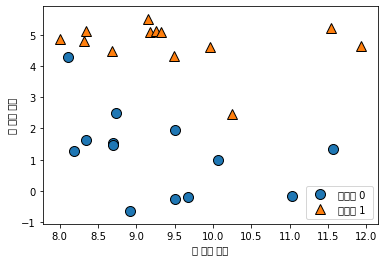

In [3]:
# data set 생성
print(mglearn)
X,y  = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(["클래스 0 ", "클래스 1"], loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
print("X.shape:", X.shape )

Text(0, 0.5, '타깃')

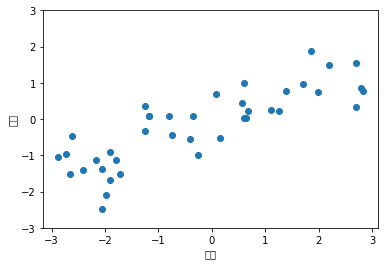

In [4]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,"o")
plt.ylim(-3,3)
plt.xlabel("특성")
plt.ylabel("타깃")

In [5]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


> scikit_learn에 포함된 dataset은 bunch객체에 저장되어있는데 bunch객체는 .표기 사용이 가능하다.


In [6]:
print("유방암 데이터의 형태: ",cancer.data.shape)

유방암 데이터의 형태:  (569, 30)


In [7]:
print("클래스별 샘플 개수:\n", {n: v for n,v in zip(cancer.target_names, np.bincount(cancer.target))})

클래스별 샘플 개수:
 {'malignant': 212, 'benign': 357}


In [8]:
print("특성이름 :\n", cancer.feature_names)

특성이름 :
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [9]:
print("자세한 정보 :\n", cancer.DESCR)

자세한 정보 :
 .. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is

In [10]:
from sklearn.datasets import load_boston
boston = load_boston()
print("데이터의 형태 :", boston.data.shape)


데이터의 형태 : (506, 13)


특성(feature)을 유도하고 조정하는 것을 feature engineering이라고 한다.

In [11]:
X,y = mglearn.datasets.load_extended_boston()
print("X.shape:", X.shape)

X.shape: (506, 104)


기존 13개 특성에서 2개씩 짝지어만든 91개 특성을 더해 104개가 되었다.

### k-최근접 이웃

k-NN(Nearest Neighbors) 알고리즘은 가장 간단한 ML algo
train set을 그냥 저장하는것이 Model 생성의 전부이다.
new data에 대해서 예측할떈 algo train set에서 가장 가까운 data point를 가져옴.

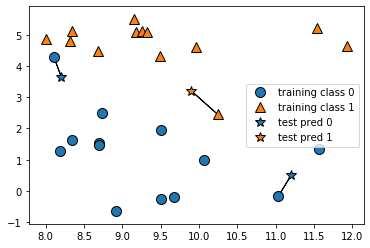

In [12]:
mglearn.plots.plot_knn_classification(n_neighbors=1)


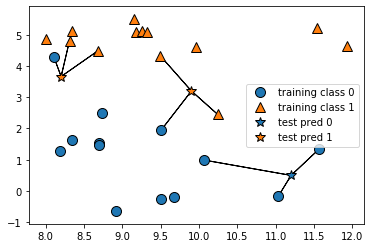

In [13]:
mglearn.plots.plot_knn_classification(n_neighbors=3)


> 위에서 볼 수 있듯 최근접 n개의 클래스에서 더 많은 클래스를 선택

In [14]:
from sklearn.model_selection import train_test_split

X,y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)

In [16]:
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [17]:
print("테스트 세트 예측:", clf.predict(X_test))



테스트 세트 예측: [1 0 1 0 1 0 0]


In [18]:
print(f"테스트 세트 정확도 : {clf.score(X_test,y_test):.2}")

테스트 세트 정확도 : 0.86


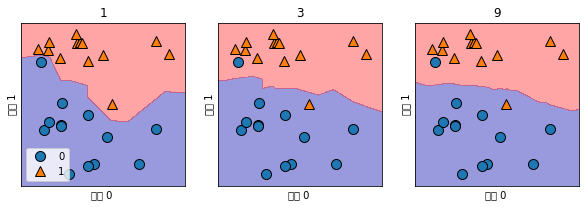

In [19]:
fig, axes = plt.subplots(1,3,figsize=(10,3)) #한줄에 4칸을 만들겠다. 

for n_neighbors, ax in zip([1,3,9], axes): #번호와 위치를 알려줌
    # fit 메서드는 self obj를 리턴
    # 따라서 객체생성과 fit method를 한줄에 사용할 수 있다. 
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha = .4)
    mglearn.discrete_scatter(X[:, 0], X[:,1], y, ax=ax)
    ax.set_title(f"{n_neighbors}")
    ax.set_xlabel("특성 0 ")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)

위의 코드를 실행하면 이웃 갯수에 따라 클래스를 색으로 칠한 decision boundary를 확인할 수 있다.

이웃의 갯수가 늘어날수록 더 부드러운 경계를 가지고 이는 단순한 모델을 의미한다.

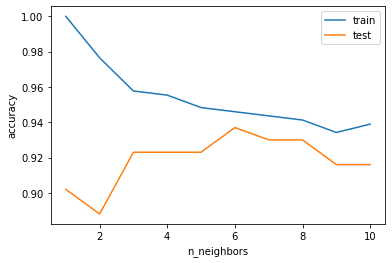

In [20]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target, stratify = cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# 1~10까지 n적용

neighbors_settings=range(1,11)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X_train,y_train)
    #훈련세트 정확도 저장
    training_accuracy.append(clf.score(X_train,y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test,y_test))

plt.plot(neighbors_settings,training_accuracy, label="train")
plt.plot(neighbors_settings,test_accuracy, label="test")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()



> 위의 그래프를 보면 n 이 작으면 모델이 너무 복잡하게 구성이 되고 n이 크면 모델이 너무 단순하게 구성이되 되려 정확도가 나빠지는 것을 알수 있다.

* 최근접 이웃 회귀

knn 알고리즘은 회귀 분석에도 쓰인다.


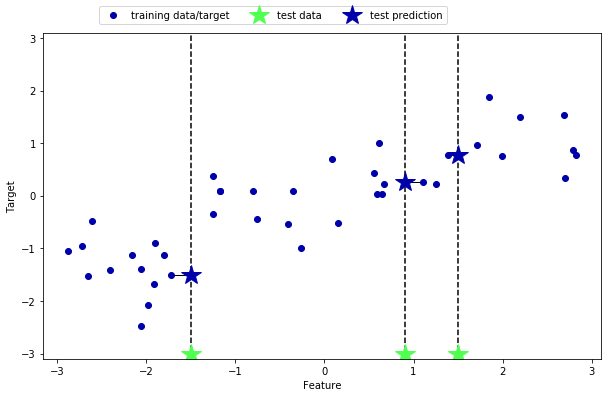

In [21]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

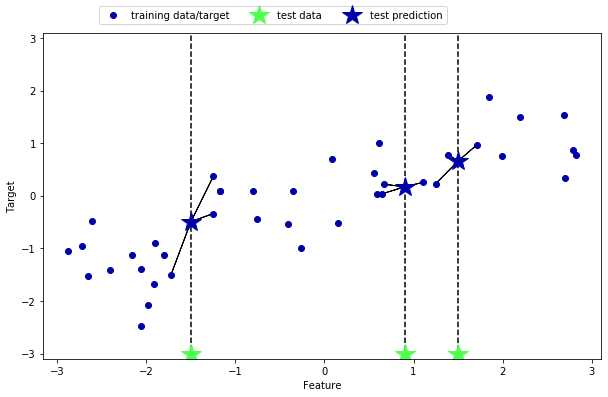

In [22]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [23]:
from sklearn.neighbors import KNeighborsRegressor


X, y = mglearn.datasets.make_wave(n_samples= 40)

# wave dataset을 train st과 test set으로 나눈다
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 이웃의 수를 3으로 하여 모델의 객체를 만든다
reg = KNeighborsRegressor(n_neighbors=3)
# 훈련 데이터와 타깃을 사용해 모델을 학습
reg.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [24]:
print("테스트 데이터 예측: \n", reg.predict(X_test))


테스트 데이터 예측: 
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


score를 이용해서 모델을 평가할수있는데 regression일땐 R^2값을 반환한다.
결정계수라고도 하는 R^2값은 회귀 모델에서 predict의 적합도를 측정한것으로 0~1사이의 값이 된다.
0은 trin set의 출력이 y_train의 평균으로만 하는 경우고, 1은 예측이 완벽한 경우이다.(음수는 예측과 결과가 상반된 경우를 의미한다.))

In [25]:
print(f"테스트 세트 R^2 : {reg.score(X_test,y_test)}")


테스트 세트 R^2 : 0.8344172446249605


### KNeighborsRegressor 분석

가능한 모든 특성을 만들어서 예측을 해볼 수 있다.

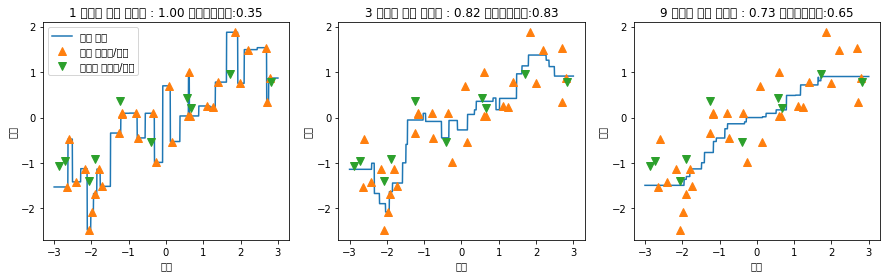

In [26]:
fig, axes = plt.subplots(1,3 , figsize=(15,4))
line = np.linspace(-3,3,1000).reshape(-1,1)

for n_neighbors, ax in zip([1,3,9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, "^", markersize = 8)
    ax.plot(X_test,y_test, 'v', markersize= 8)

    ax.set_title(f"{n_neighbors} 이웃의 훈련 스코어 : {reg.score(X_train,y_train):.2f} 테스트스코어:{reg.score(X_test,y_test):.2f}")
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
    axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"],loc="best")


#### 장단점과 매개변수

KNN에서 중요한 매겨변수는 거리를 재는 방법과 이웃수 두개가 있다.
거리는 일반적으로 유클리디안 방식, 그리고 이웃수는 3~5근처로 잡는게 보편적이고 잘돌아 간다.

더 복잡한 모델을 사용하기에 좋지만, 전처리 과정(정규화 등))이 중요하다.
그리고 Data가 커지면 커질수록 잘 동작하지 않게 된다.(뿐만아니라 data가 0인 데이터셋에서도)

실제로 많이 쓰이지는 않는다.



### 선형모델

입력 값에 대한 선형함수를 만들어서 예측을 한다.

#### 회귀의 선형모델

우리가 아는 직선의 방정식의 모양을 가진다.
그리고 b는 하나의 편향이지만 특성의 갯수에 따라서 항도 늘어난다.


w[0]: 0.393906  b: -0.031804


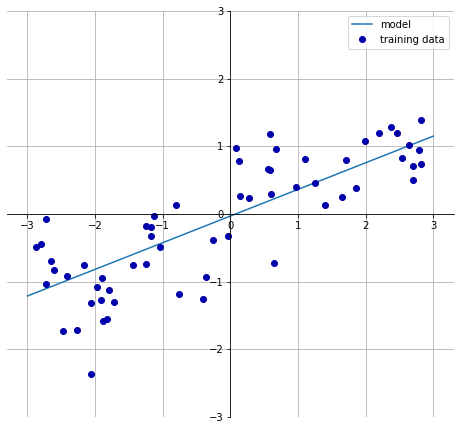

In [27]:
mglearn.plots.plot_linear_regression_wave()
# 1차원 wave dataset으로 w와 b를 직선이 되도록 학습

회귀를 위한 선형모델은 feature가 하나일때는 직선, 두개일때는 plane이 되지만 더 높은 차원은 hyperplane이 되는 특징이 있다.

이전의 KNN에 비해서 조금 심하게 단순화 한것 같지만 feature를 많이 주면 보다 훌륭한 성능을 낼 수 있다.
train data보다 feature가 더 많으면 선형함수에 대해서 완벽하게 모델링 할수 있따.

지금부터 Regression에서 가장 인기있는 linear model들을 살펴보자

* linear regression(최소 제곱법)

선형회귀 or 최소제곱은 가장 간단하고 오래된 알고리즘이다. 
예측과 y의 평균 제곱오차를 최소화하는 param w와 b를 찾는다.
매개변수가 없어서 단순하지만 모델의 복잡도를 제어할 수 있는 방법도 없다.

In [28]:
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
lr = LinearRegression().fit(X_train,y_train)

# w를 가중치라고 한다. (coef_에저장)
# b를 편향이라한다.(intercept_에 저장) scikit learn은 훈련데이터에서 유도된 속성 끝에 항상 밑줄을 붙인다.(사용자가 지정한매개변수와 구분하기 위해) 

In [29]:
print("lr.coef_:",lr.coef_)
print("lr.intercept_:", lr.intercept_)


lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [30]:
print(f"훈련 세트 점수 : {lr.score(X_train, y_train):.2f}")
print(f"테스트 세트 점수 : {lr.score(X_test, y_test):.2f}")

훈련 세트 점수 : 0.67
테스트 세트 점수 : 0.66


> 트레인 셋과 테스트 셋의 점수가 매우 비슷한데, 이는 과소적합이다. 1차원 dataset은 과대적합을 걱정할 필요없고, 고차원 dataset에서 선형모델의 성능에서 과대적합을 걱정해야할 필요가 있다.

In [31]:
X,y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
lr= LinearRegression().fit(X_train, y_train)
print(f"훈련 세트 점수 : {lr.score(X_train, y_train):.2f}")
print(f"테스트 세트 점수 : {lr.score(X_test, y_test):.2f}")

# 이건 테스트 세트 점수와의 성능차이가 있다(테스트 데이터가 더 안좋음)). 따라서 과대적합이 되었다는 것을 알수 잇는데, 복잡도를 제어할수 있는 모델을 사용하자.

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.61


## 리지 회귀

Ridge도 회귀를 위한 선형모델이므로 최소제곱과 같은 예측함수를 사용한다. 하지만 리지에서 중요한 w(가중치)선택은 잘 예측하기위함뿐만아니라 추가 제약조건을 만족시키기 위함도 있다.

즉  w의 모든 원소가 0에 가깝게 되기를 바란다.==>가중치의 절댓값을 가능한한 작게 만들고 싶다. (이는 특성이 출력에 주는 영향을 최소로 만드는것, 그리고 이러한 제약을 규제라고 한다.)
규제란 과대적합이 되지않게 모델을 강제로 제한한다는 의미이다.

그리고 리지 회귀에 사용되는 규제방식을 L2 규제라고 한다.(norm제곱을 패널티 적용)


In [32]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train,y_train)
print(f"테스트 세트 점수: {ridge.score(X_train,y_train):.2f}")
print(f"테스트 세트 점수: {ridge.score(X_test,y_test):.2f}")

테스트 세트 점수: 0.89
테스트 세트 점수: 0.75


In [33]:
from sklearn.linear_model import Ridge

ridge10 = Ridge(alpha=10).fit(X_train,y_train)
print(f"테스트 세트 점수: {ridge10.score(X_train,y_train):.2f}")
print(f"테스트 세트 점수: {ridge10.score(X_test,y_test):.2f}")

테스트 세트 점수: 0.79
테스트 세트 점수: 0.64


In [34]:
from sklearn.linear_model import Ridge

ridge01 = Ridge(alpha=0.1).fit(X_train,y_train)
print(f"테스트 세트 점수: {ridge01.score(X_train,y_train):.2f}")
print(f"테스트 세트 점수: {ridge01.score(X_test,y_test):.2f}")

테스트 세트 점수: 0.93
테스트 세트 점수: 0.77


위의 결과들에서 보듯 trainset의 점수는 낮지만 test set의 점수는 더 높다.
Ridge는 덜 자유롭기때문에 과대적합이 안 된다.
모델의 복잡도가 낮으면 훈련에서의 성능은 낮아지지만 일반화는 더 된것으로 볼수 잇는데. test set에 대한 성능이 우리에겐 중요하므로 linearRegression보다 Ridge가 낫다.

우리는 알파를 조절해서 훈련세트의 성능대비 모델을 얼마나 단순화 할지 지정할 수 있다.

> 그리고 위의 여러 case와 같이 alpha값을 줄이면 계수의 제약이 풀리면서 조금더 단순화된 모델의 형태로 갈수 있게 된다.


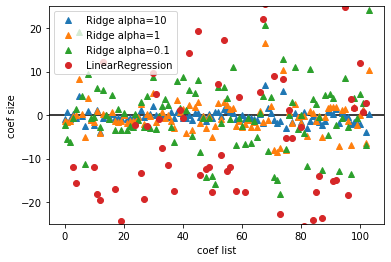

In [35]:
plt.plot(ridge10.coef_, "^", label="Ridge alpha=10")
plt.plot(ridge.coef_, "^", label="Ridge alpha=1")
plt.plot(ridge01.coef_, "^", label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("coef list")
plt.ylabel("coef size")
xlims = plt.xlim()
plt.hlines(0,xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25,25)
plt.legend()


규제의 효과를 이해하는 다른 방법은 alpha값을 고정해놓고 trai data set의 size를 변화시켜 보는 것이다. dataset의 size에 따른 model의 성능 변화를 learning curve로 나타낼수 잇따.

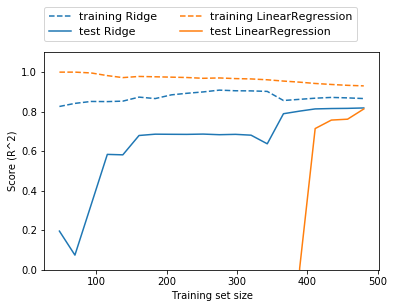

In [36]:
mglearn.plots.plot_ridge_n_samples()

일반적으로 리지가 선형회귀보다 좋은데 데이터가 많아질수록 규제항은 덜 중요해져서 리지와 선형의 성능이 같아질것이라는 것을 알수 있다.
그렇지만 또 데이터가 너무 많으면 또 과대적합이 발생해서 성능이 감소할수있다(데이터를 기억하기 힘들어진다.)

## 라소

> 리지회귀의 대안으로 라소도 계수를 0에 가깝게 만드는 것은 같다. 하지만 L1 규제를 한다. 이로써 어떤 계수를 0으로 만들고 이는 완전히 제외되는 특성이 생긴다는 의미다.
즉 특성 선택이 자동으로 이루어지고, 모든 특성을 사용하는게 아니라 중요한 특성에 더 힘을 줄수있는 것이다.

In [37]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train,y_train)
print(f"훈련 세트 점수 : {lasso.score(X_train, y_train):.2f}")
print(f"훈련 세트 점수 : {lasso.score(X_test, y_test):.2f}")
print("사용한 특성의 갯수:", np.sum(lasso.coef_ !=0))


훈련 세트 점수 : 0.29
훈련 세트 점수 : 0.21
사용한 특성의 갯수: 4


In [38]:
# max_iter 기본값을 증가시키지 않으면 증가시키라는 경고가 발생한다. 
# 반복실행하는 최대 횟수
lasso001 = Lasso(alpha = 0.01, max_iter=100000).fit(X_train,y_train)
print(f"훈련 세트 점수 : {lasso001.score(X_train, y_train):.2f}")
print(f"훈련 세트 점수 : {lasso001.score(X_test, y_test):.2f}")
print("사용한 특성의 갯수:", np.sum(lasso001.coef_ !=0))


훈련 세트 점수 : 0.90
훈련 세트 점수 : 0.77
사용한 특성의 갯수: 33


In [39]:
# max_iter 기본값을 증가시키지 않으면 증가시키라는 경고가 발생한다. 

lasso00001 = Lasso(alpha = 0.0001, max_iter=100000).fit(X_train,y_train)
print(f"훈련 세트 점수 : {lasso00001.score(X_train, y_train):.2f}")
print(f"훈련 세트 점수 : {lasso00001.score(X_test, y_test):.2f}")
print("사용한 특성의 갯수:", np.sum(lasso00001.coef_ !=0))


훈련 세트 점수 : 0.95
훈련 세트 점수 : 0.64
사용한 특성의 갯수: 96


Text(0, 0.5, '계수 크기')

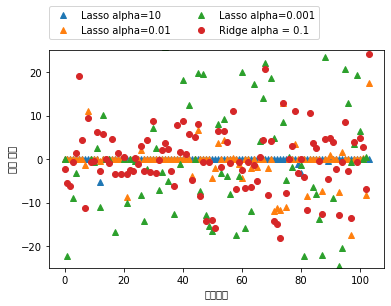

In [40]:
plt.plot(lasso.coef_, "^", label="Lasso alpha=10")
plt.plot(lasso001.coef_, "^", label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, "^", label="Lasso alpha=0.001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha = 0.1")
plt.legend(ncol = 2, loc=(0,1.05))
plt.ylim(-25,25)
plt.xlabel("계수목록")
plt.ylabel("계수 크기")

> alpha= 0.1 인 Ridge 모델은 alpha =0.0-1인 lasso모델과 성능이 비슷하지만 ridge를 사용하면 어떤계수도 0이 되지않는다.

따라서 두 모델중 일반적으로는 리지회귀를 선호하는데, 일부만 중요하다면 Lasso가 더 좋을수 있다. 그리고 분석하기 쉬운것도 Lasso인데 입력 feture중 일부만 사용하기 때문이다.

>그리고 scikit-learn은 Lasso와 Ridge를 결합한 ElasticNet도 제공한다.
최상의 성능을 내지만 L1규제, L2규제를 위한 매개변수 두개를 조정해야한다.


### 분류형 선형모델
선형모델은 분류에서도 널리 쓰인다.
이진분류부터 보면 선형회귀랑 비슷하지만 기준값을 0으로 두고 0보다 작으면 클래스를 -1 크면 +1이라고 예측한다.

분류용 선형모델에서는 *결정경계가*가 입력의 선형함수이다.(선,평면,초평면을 사용해 클래스를 구분하는 분류기이다)

선형모델을 학습시키는 알고리즘은 다양한데
* 특정 계수와 절편의 조합이 train data에 얼마나 잘 맞는지
* 사용할 수 있는 규제가 있으면 어떤 방식인지.

## 선형 분류 알고리즘
* 로지스틱 회귀(이름은 회귀지만 선형==>분류이다)
* svm(Support vector classifier) 서포트 벡터 머신.

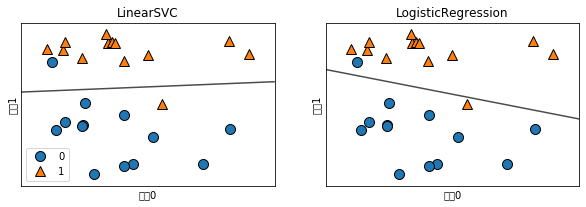

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y= mglearn.datasets.make_forge()
fig, axes = plt.subplots(1,2,figsize=(10,3))

for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()],axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps = 0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("특성0")
    ax.set_ylabel("특성1")

axes[0].legend()

In [42]:
mglearn.plots.plot_linear_Svc_regularization()

AttributeError: module 'mglearn.plots' has no attribute 'plot_linear_Svc_regularization'

logisticRegression 과 LinearSVC의 규제 강도를 결정하는것은 매개변수 C인데, C가 높아지면 규제가 감소하고. 다시 말해 훈련세트에 가능한 가까이 맞추려 한다.

다른말로는 C를 높이면 개개의 데이터 포인트를 더 많이 반영하려고 하는것이다.

회귀와 비슷하게 분류에서 선형 모델은 낮은 차원의 data에서 결정경계가 직선이나 평면이여서 제한이 많은것 처럼 보이지만 고차원에서는 이 모델이 강력해서 과대적합 되지않도록 하는것이 중요하다


In [88]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target , random_state=42
)
logreg = LogisticRegression(max_iter=5000).fit(X_train,y_train)
print(f"훈련 세트 점수: {logreg.score(X_train,y_train):.3f}")
print(f"훈련 세트 점수: {logreg.score(X_test,y_test):.3f}")

# 뭔가 성능이 비슷하니까 과소적합인거 같다.

훈련 세트 점수: 0.958
훈련 세트 점수: 0.958


In [89]:
logreg100 = LogisticRegression(C=100,max_iter=5000).fit(X_train,y_train)
print(f"훈련 세트 점수: {logreg100.score(X_train,y_train):.3f}")
print(f"훈련 세트 점수: {logreg100.score(X_test,y_test):.3f}")

훈련 세트 점수: 0.981
훈련 세트 점수: 0.972


In [90]:
logreg001 = LogisticRegression(C=0.01,max_iter=5000).fit(X_train,y_train)
print(f"훈련 세트 점수: {logreg001.score(X_train,y_train):.3f}")
print(f"훈련 세트 점수: {logreg001.score(X_test,y_test):.3f}")

훈련 세트 점수: 0.953
훈련 세트 점수: 0.951


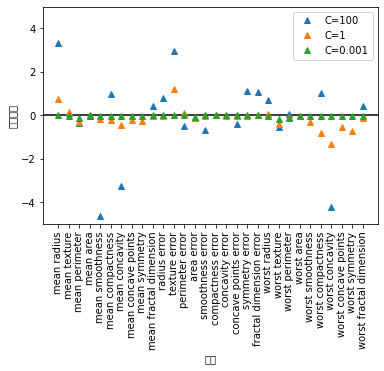

In [109]:
plt.plot(logreg100.coef_.T, "^", label="C=100")
plt.plot(logreg.coef_.T, "^", label="C=1")
plt.plot(logreg001.coef_.T, "^", label="C=0.001")

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5,5)
plt.xlabel("특성")
plt.ylabel("계수크기")
plt.legend()

>LogisticRegression은 기본적으로 L2규제를 적용해 Ridge로 만든 모습과 비슷하다. 규제를 강하게 할수록 0에 가까워지지만 0이 되지는 않는다.

우리는 몇가지의 특성만 뽑아내서 사용하고 싶은면 L1규제를 사용해주면 된다.

이진분류의 선형모델과 회귀의 선형모델은 유사점이 많다.
회귀에서 처엄 모델들간의 ㅜㅈ요 차이는 모두 이용할지 일부만 이용할지.

## 다중 클래스 분류용 선형모델
많은 선형 분류 모델은 태생적으로 이진 분류만을 지원한다

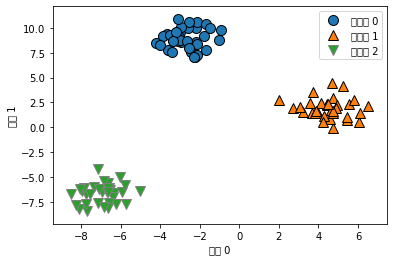

In [47]:
from sklearn.datasets import make_blobs
X,y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1","클래스 2"])

In [49]:
linear_svm = LinearSVC().fit(X,y)
print("계수 배열으 크기: ", linear_svm.coef_.shape)

print("절편 배열으 크기: ", linear_svm.intercept_.shape)

계수 배열으 크기:  (3, 2)
절편 배열으 크기:  (3,)


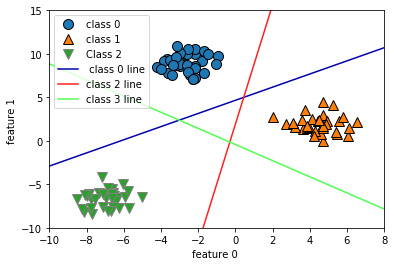

In [57]:
mglearn.discrete_scatter(X[:, 0 ], X[:,1],y)
line = np.linspace(-15,15)
for coef,intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0]+ intercept)/coef[1],c=color)
    plt.ylim(-10,15)
    plt.xlim(-10,8)
    plt.xlabel("feature 0 ")
    
    plt.ylabel("feature 1 ")
    plt.legend(['class 0 ', "class 1", "Class 2"," class 0 line", "class 2 line", "class 3 line"])

가운데 삼각형은 분류 공식의 결과가 가장 높은 애로 보내준다.

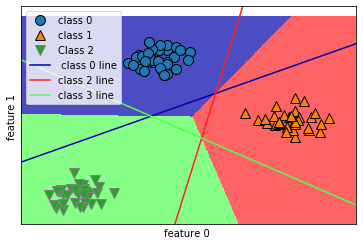

In [58]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True,alpha=.7)
mglearn.discrete_scatter(X[:, 0 ], X[:,1],y)
line = np.linspace(-15,15)
for coef,intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0]+ intercept)/coef[1],c=color)
    plt.ylim(-10,15)
    plt.xlim(-10,8)
    plt.xlabel("feature 0 ")
    
    plt.ylabel("feature 1 ")
    plt.legend(['class 0 ', "class 1", "Class 2"," class 0 line", "class 2 line", "class 3 line"])

### 장단점과 매개변수

선형모델의 주요 매개변수는 alpha였고, linearSVC와 logisticRegression에서는 C이다.

alpha가 클수록, C가 작을수록 모델이 단순해지고, 규제가 커진다.(개개인의 특성이 적게 반영된다.)

이러한 매개변수를 log scale을 통해 최저치 정하고. L1, L2규제를 정하면 된다.
중요한 특성이 많지 않으면 L1규제

데이터가 많아지면 SGDclassifier나 SGDRegressor를 사용할 수 있따.

> 일반적으로 선형모델은 샘플에 비해 특성이 많을때 잘 작동한다.


### 나이브 베이즈 분류기

선형모델과 유사하지만 훈련속도가 빠른 대신 일반화 성능이 뒤진다

특징으로는 각 특성을 개별로 취급해 parameter학습하고, 통계를 취합하는 방식을 쓴다.

* GaussianNB : 연속적 데이터 적용 (클래스별로 표준편차와 평균 저장)
* BernoulliNB : 이진데이터
* MultinomialNB  : 카운트 데이터 (클래스별로 특성의 평균을 계산)

#### 장단점과 매개변수

MultinomialNB와 BernoulliNB는 모델의 복잡도를 조절하는 alpha 매개변수 하나를 가지고 잇다.
(하지만 매개변수에 민감하지는 않다)

GaussianNB은 고차원 dataset에 사용하고 다른 나베 모델은 텍스트 같은 희소한 data count에 쓴다.
특히 MultinomialNB는 0이 아닌 특성이 비교적 많은 dataset에서 BernoulliNB보다 성능이 좋다.

따라서 선형모델로 학습이 오래 걸리는 경우 NB모델을 시도해 보는것도 좋다.